<a href="https://colab.research.google.com/github/markcam1/machine-learning-00/blob/main/Final_Project_Tech27_Part-02_cluster01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Predictive Modeling of S&P 500 Stock Price Behaviors

Cluster: K-Means


# Imports

In [ ]:
#######################
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')


print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Unsupervised Learning
Analysis Date: 2025-08-28 16:27:27


# Data Load




## File Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sp500_stocks_feature-eng.csv')

print("File loaded successfully!")
print(df.head())


Mounted at /content/drive
File loaded successfully!
         Date Symbol       Open       High        Low      Close     Volume  \
0  2010-02-17      A  19.333031  19.575014  19.186569  19.504965  4891183.0   
1  2010-02-18      A  19.466763  19.740585  19.383981  19.727848  3313959.0   
2  2010-02-19      A  19.638699  19.912520  19.498604  19.867945  4186171.0   
3  2010-02-22      A  19.925251  19.925251  19.645064  19.836102  4038123.0   
4  2010-02-23      A  19.797895  19.842470  19.441291  19.645065  4366373.0   

   Year    Return  Annual_Vol  ...  Volume_MA_30  Volume_Ratio_10d  PV_Trend  \
0  2010  0.008893     0.23301  ...  5.170074e+06          0.724769  0.136982   
1  2010  0.013412     0.23301  ...  5.141005e+06          0.512090  0.201361   
2  2010  0.011673     0.23301  ...  5.172418e+06          0.672281  0.177984   
3  2010 -0.004474     0.23301  ...  5.203850e+06          0.711443 -0.068058   
4  2010 -0.007719     0.23301  ...  5.224932e+06          0.805576 -0.118

## Dataset review

In [ ]:
####################################
# BASIC DATASET INFO

print(f"\nDATASET OVERVIEW:")
print("-" * 30)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")


DATASET OVERVIEW:
------------------------------
Shape: 1,660,958 rows × 47 columns
Memory Usage: 1029.33 MB
Date Range: 2010-02-17 to 2025-08-15


In [ ]:
############################
# Numerical Columns:

print(f"\nNUMERICAL COLUMNS STATISTICS:")
print("-" * 30)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print()
print(df[numerical_cols].describe())



NUMERICAL COLUMNS STATISTICS:
------------------------------
Numerical columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Return', 'Annual_Vol', 'Roll_Vol_30d', 'Return_Daily', 'Return_t-1', 'Return_t-2', 'MA_5', 'MA_10', 'MA_20', 'MA_50', 'MA_200', 'Price_to_MA20', 'Price_to_MA50', 'EMA_5', 'EMA_10', 'EMA_12', 'EMA_20', 'EMA_26', 'EMA_50', 'Price_to_EMA10', 'Price_to_EMA20', 'Price_to_EMA50', 'EMA_Cross_5_10', 'EMA_Cross_10_20', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'RSI', 'Volume_MA_10', 'Volume_MA_30', 'Volume_Ratio_10d', 'PV_Trend', 'Sharpe_252d', 'Target_Return_Next_Day', 'Target_Direction_Next_Day', 'Target_Return_Next_Week']

               Open          High           Low         Close        Volume  \
count  1.660958e+06  1.660958e+06  1.660958e+06  1.660958e+06  1.660958e+06   
mean   1.030498e+02  1.041873e+02  1.018926e+02  1.030675e+02  7.044966e+06   
std    2.465424e+02  2.494684e+02  2.436931e+02  2.466088e+02  3.346570e+07   
min    1.998924e-01  2.074570

# Clustering

In [ ]:
####################
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')



## Feature columns and Standardization

In [ ]:
# Select numerical features for clustering (excluding target variables and identifiers)
feature_columns = [
    'Return', 'Annual_Vol', 'Roll_Vol_30d', 'Return_Daily',
    'Return_t-1', 'Return_t-2', 'Price_to_MA20', 'Price_to_MA50',
    'Price_to_EMA10', 'Price_to_EMA20', 'Price_to_EMA50',
    'EMA_Cross_5_10', 'EMA_Cross_10_20', 'MACD', 'MACD_Signal',
    'MACD_Histogram', 'RSI', 'Volume_Ratio_10d', 'PV_Trend', 'Sharpe_252d'
]

# Create feature matrix
X = df[feature_columns].copy()

print("Feature matrix shape:", X.shape)
print("Features selected:", feature_columns)

Feature matrix shape: (1660958, 20)
Features selected: ['Return', 'Annual_Vol', 'Roll_Vol_30d', 'Return_Daily', 'Return_t-1', 'Return_t-2', 'Price_to_MA20', 'Price_to_MA50', 'Price_to_EMA10', 'Price_to_EMA20', 'Price_to_EMA50', 'EMA_Cross_5_10', 'EMA_Cross_10_20', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'RSI', 'Volume_Ratio_10d', 'PV_Trend', 'Sharpe_252d']


## PCA

In [ ]:
################################
# Standardize features
print("Scaling features ...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully!")
print("\nScaled data shape:", X_scaled.shape)
print("Mean of scaled features:", np.mean(X_scaled, axis=0)[:5])
print("Std of scaled features:", np.std(X_scaled, axis=0)[:5])

# Create PCA for visualization
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

Scaling features ...
Features scaled successfully!

Scaled data shape: (1660958, 20)
Mean of scaled features: [ 4.22871315e-18 -1.39986875e-15 -8.48600274e-16 -2.34429419e-18
  1.53469989e-17]
Std of scaled features: [1. 1. 1. 1. 1.]

PCA explained variance ratio: [0.3381802  0.16069858 0.10569272 0.08044361 0.06363258]
Total variance explained: 0.749


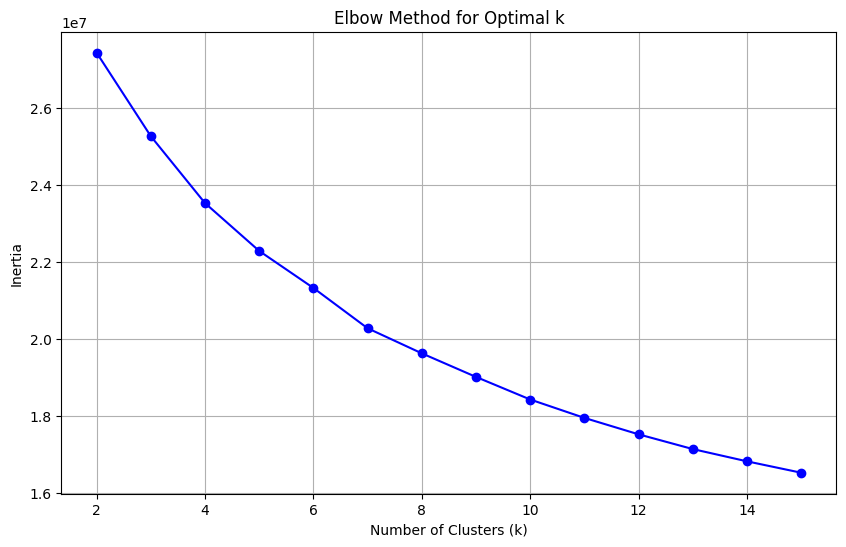

In [ ]:
# Determine optimal number of clusters using elbow method
def plot_elbow_method(X, max_k=15):
    inertias = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

# Plot elbow method
plot_elbow_method(X_scaled)

## K-Means

In [ ]:
# Based on elbow method, select fewer k values to test
'''
* Silhouette Score for k=5 was 0.120, while k=3 was 0.159
* Davies-Bouldin Score for k=5 was 1.769, while k=7 was 1.618.
'''

k_values = [3, 4, 5, 6]
kmeans_results = {}

print(f"Testing K-Means on full dataset ({len(X_scaled):,} rows)...")

for i, k in enumerate(k_values):
    print(f"Running K-Means with k={k} ({i+1}/{len(k_values)})...")

    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=3, max_iter=100)
    labels = kmeans.fit_predict(X_scaled)

    print(f"  Clustering completed. Computing metrics...")

    # Calculate metrics on a sample for speed
    # Use 100K sample for metric calculation
    sample_size = min(100000, len(X_scaled))
    sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)

    sil_score = silhouette_score(X_scaled[sample_idx], labels[sample_idx])
    db_score = davies_bouldin_score(X_scaled[sample_idx], labels[sample_idx])

    # Store results
    kmeans_results[k] = {
        'labels': labels,
        'silhouette': sil_score,
        'davies_bouldin': db_score,
        'cluster_sizes': np.bincount(labels)
    }

    print(f"    K-Means with k={k} completed:")
    print(f"    Silhouette Score: {sil_score:.3f}")
    print(f"    Davies-Bouldin Score: {db_score:.3f}")
    print(f"    Cluster sizes: {np.bincount(labels)}")

Testing K-Means on full dataset (1,660,958 rows)...
Running K-Means with k=3 (1/4)...
  Clustering completed. Computing metrics...
    K-Means with k=3 completed:
    Silhouette Score: 0.161
    Davies-Bouldin Score: 1.922
    Cluster sizes: [916411 470995 273552]
Running K-Means with k=4 (2/4)...
  Clustering completed. Computing metrics...
    K-Means with k=4 completed:
    Silhouette Score: 0.122
    Davies-Bouldin Score: 2.027
    Cluster sizes: [589619 197782 741599 131958]
Running K-Means with k=5 (3/4)...
  Clustering completed. Computing metrics...
    K-Means with k=5 completed:
    Silhouette Score: 0.120
    Davies-Bouldin Score: 1.775
    Cluster sizes: [578122 135691 226532   2182 718431]
Running K-Means with k=6 (4/4)...
  Clustering completed. Computing metrics...
    K-Means with k=6 completed:
    Silhouette Score: 0.127
    Davies-Bouldin Score: 1.764
    Cluster sizes: [687292   2100  91329 220743 207956 451538]


### K-means analysis

**Analysis of the Final Metrics**

**Silhouette Score**: The score for _k=3 (0.161)_ is the clear winner, being significantly higher than all other k values. A higher Silhouette Score indicates that the clusters are more distinct and well-separated from one another.

**Davies-Bouldin Score**: The scores for k=5 and k=6 are the lowest, which suggests a high degree of internal compactness. However, the score for k=4 is surprisingly the worst of the group, which shows that the algorithm struggled to find a good partitioning with four clusters.

**Cluster Sizes**: k=3 and k=4 result in a good distribution of cluster sizes. k=5 and k=6 both produce a very small cluster.

**Conclusion:** Based on review of the Elbow Method, the Silhouette Score, the Davies-Bouldin Score, and the resulting cluster sizes— the decision is k=3.

In [ ]:
import joblib, numpy as np, os

# Save dictionary
joblib.dump(kmeans_results, "/content/kmeans_results.joblib", compress=3)

# --- Save arrays
np.save("/content/X_scaled.npy", X_scaled)
np.save("/content/X_pca.npy", X_pca)
-
os.sync()

print("Files saved in /content")


Files saved in /content


In [ ]:
!cp /content/kmeans_results.joblib /content/drive/MyDrive/
!cp /content/X_scaled.npy /content/drive/MyDrive/
!cp /content/X_pca.npy /content/drive/MyDrive/


In [ ]:
# save results
import pickle

# Save  results to files
with open('kmeans_results.pkl', 'wb') as f:
    pickle.dump(kmeans_results, f)

# save the scaled data
np.save('X_scaled.npy', X_scaled)
np.save('X_pca.npy', X_pca)

# Save a summary
summary_data = {
    'dataset_shape': df.shape,
    'features_used': feature_columns,
    'kmeans_summary': {k: {'silhouette': v['silhouette'],
                           'davies_bouldin': v['davies_bouldin'],
                           'cluster_sizes': v['cluster_sizes'].tolist()}
                      for k, v in kmeans_results.items()}
}

with open('analysis_summary.pkl', 'wb') as f:
    pickle.dump(summary_data, f)

print("  Results saved! Files created:")
print("- kmeans_results.pkl")
print("- X_scaled.npy")
print("- X_pca.npy")
print("- analysis_summary.pkl")

## Load Pickle X, K-Means results

## Agglomerative Clustering


### Load Pickle Files

After crash or colab timeout

In [ ]:
import joblib, numpy as np

# Load dict
kmeans_results = joblib.load("/content/drive/MyDrive/kmeans_results.joblib")

# Load arrays
X_scaled = np.load("/content/drive/MyDrive/X_scaled.npy")
X_pca = np.load("/content/drive/MyDrive/X_pca.npy")

print("Reload complete")


Reload complete


In [ ]:
print(f"Shape of the scaled data (X_scaled): {X_scaled.shape}")
print(f"Shape of the PCA-transformed data (X_pca): {X_pca.shape}")
print("-" * 50)

Shape of the scaled data (X_scaled): (1660958, 20)
Shape of the PCA-transformed data (X_pca): (1660958, 5)
--------------------------------------------------


Generating a Dendrogram from a sample of the data ... 
Dendrogram plot created


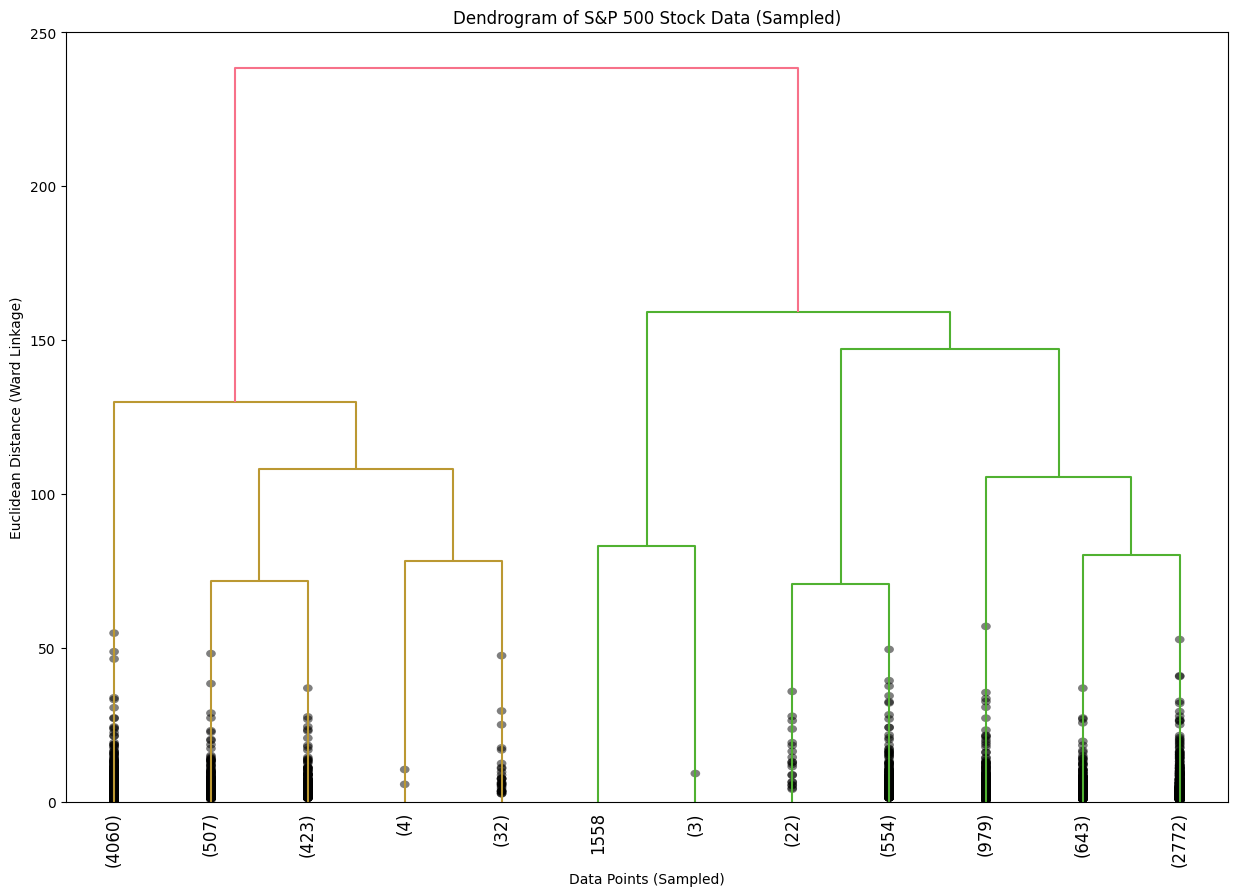

--------------------------------------------------


In [ ]:
import scipy.cluster.hierarchy as shc

# A dendrogram is a tree-like diagram that records the sequences of merges
# or splits.
print("Generating a Dendrogram from a sample of the data ... ")

# Take a random sample of 10,000 data points
sample_size = min(10000, X_scaled.shape[0])
np.random.seed(42)
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[sample_indices]

plt.figure(figsize=(15, 10))
plt.title("Dendrogram of S&P 500 Stock Data (Sampled)")
plt.xlabel("Data Points (Sampled)")
plt.ylabel("Euclidean Distance (Ward Linkage)")

# The 'linkage' function calculates the distance between clusters.
linkage_matrix = shc.linkage(X_sample, method='ward')

# The 'dendrogram' function plots the hierarchy.
shc.dendrogram(linkage_matrix,
               truncate_mode='lastp',
               p=12,
               leaf_rotation=90.,
               leaf_font_size=12.,
               show_contracted=True)

print("Dendrogram plot created")
plt.show()
print("-" * 50)

In [ ]:
# # Agglomerative Clustering
# # 5 clusters as a starting point.
# print("Performing Agglomerative Clustering ... ")
# # We will use the full dataset for the actual clustering
# num_clusters = 5
# print(f"Initializing Agglomerative Clustering with {num_clusters} clusters.")

# # Initialize the model
# agg_cluster_model = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')

# # Fit the model and get the cluster labels for each data point
# print("Fitting the model to the scaled data...")
# agg_labels = agg_cluster_model.fit_predict(X_scaled)
# print("Clustering complete.")
# print(f"Unique cluster labels found: {np.unique(agg_labels)}")
# print("-" * 50)

Performing Agglomerative Clustering ... 
Initializing Agglomerative Clustering with 5 clusters.
Fitting the model to the scaled data...


In [ ]:
# we will perform the clustering on a larger sample of the data, not the full dataset.
print("Performing Agglomerative Clustering on a Sample ... ")

# Define a sample size for clustering that is manageable for memory
sample_size_cluster = min(30000, X_scaled.shape[0])
print(f"Taking a random sample of {sample_size_cluster} data points for clustering.")
np.random.seed(42)
sample_indices_cluster = np.random.choice(X_scaled.shape[0], sample_size_cluster, replace=False)

# Create samples from both the scaled data (for clustering) and PCA data (for plotting)
X_scaled_sample = X_scaled[sample_indices_cluster]
X_pca_sample = X_pca[sample_indices_cluster]

num_clusters = 5
print(f"Initializing Agglomerative Clustering with {num_clusters} clusters.")

# Initialize the model
agg_cluster_model = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')

# Fit the model and get the cluster labels for each data point in the sample
print("Fitting the model to the sampled scaled data...")
agg_labels_sample = agg_cluster_model.fit_predict(X_scaled_sample)
print("Clustering complete.")
print(f"Unique cluster labels found: {np.unique(agg_labels_sample)}")
print("-" * 50)


Performing Agglomerative Clustering on a Sample ... 
Taking a random sample of 30000 data points for clustering.
Initializing Agglomerative Clustering with 5 clusters.
Fitting the model to the sampled scaled data...
Clustering complete.
Unique cluster labels found: [0 1 2 3 4]
--------------------------------------------------


In [ ]:
# Compute eval metrics
sil_score = silhouette_score(X_scaled_sample, agg_labels_sample)
db_score = davies_bouldin_score(X_scaled_sample, agg_labels_sample)

agg_results = {
    'labels': agg_labels_sample,
    'silhouette': sil_score,
    'davies_bouldin': db_score,
    'sample_indices': sample_indices_cluster,
    'num_clusters': num_clusters
}


In [ ]:
import joblib, os

# Save the Agg results
joblib.dump(agg_results, "/content/agg_results.joblib", compress=3)
os.sync()  # ensures file is fully written

# Sampled arrays
np.save("/content/X_scaled_sample.npy", X_scaled_sample)
np.save("/content/X_pca_sample.npy", X_pca_sample)


In [ ]:
!cp /content/agg_results.joblib /content/drive/MyDrive/
!cp /content/X_scaled_sample.npy /content/drive/MyDrive/
!cp /content/X_pca_sample.npy /content/drive/MyDrive/


Visualizing the clusters on a PCA plot ... 
PCA plot with cluster colors has been generated.


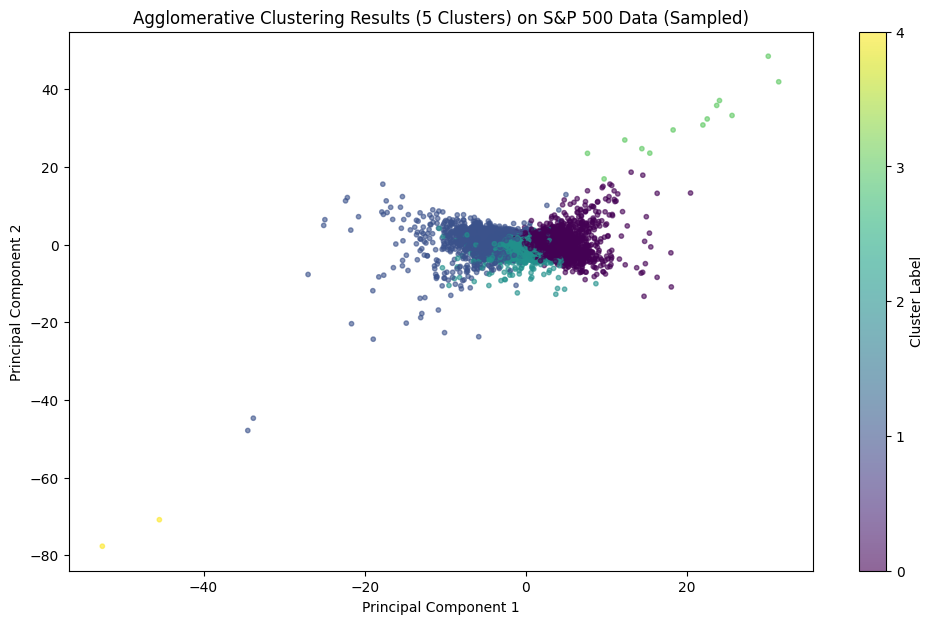

--------------------------------------------------


In [ ]:
# visualize the clusters found by the algorithm on the 2D PCA plot.
print("Visualizing the clusters on a PCA plot ... ")
plt.figure(figsize=(12, 7))

# Create a scatter plot of the first two principal components from our sample
# Color each point according to the cluster label found by Agglomerative Clustering
scatter = plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=agg_labels_sample, cmap='viridis', alpha=0.6, s=10)

plt.title(f'Agglomerative Clustering Results ({num_clusters} Clusters) on S&P 500 Data (Sampled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a colorbar to show which color corresponds to which cluster
plt.colorbar(scatter, ticks=range(num_clusters), label='Cluster Label')

print("PCA plot with cluster colors has been generated.")
plt.show()
print("-" * 50)

### PCA 2D plot analysis

* Not forming separate, circular clusters. They appear continuous, somewhat overlapping fashion.
* There are some more spread-out regions, top-right.
* There are a few very distant, isolated points (yellow dots in the bottom-left).


## HDBSCAN


HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

HDBSCAN is a powerful clustering algorithm based on DBSCAN. Unlike K-Means, it does not require you to specify the number of clusters beforehand. It can find clusters of varying densities and is excellent at identifying and ignoring noise (outliers).

In [ ]:
# #####################################
# # HDBSCAN
# hdbscan_results = {}
# # Larger min_cluster_sizes
# min_cluster_sizes = [1000, 2500, 5000]

# print(f"Testing HDBSCAN on full dataset ({len(X_scaled):,} rows)...")

# for i, min_size in enumerate(min_cluster_sizes):
#     print(f"Running HDBSCAN with min_cluster_size={min_size} ({i+1}/{len(min_cluster_sizes)})...")

#     # Fit HDBSCAN
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size,
#                                core_dist_n_jobs=1)
#     labels = clusterer.fit_predict(X_scaled)

#     print(f"  Clustering completed. Analyzing results...")

#     # Filter out noise
#     if len(np.unique(labels)) > 1 and np.sum(labels >= 0) > 0:
#         # Calculate metrics on sample of non-noise points for speed
#         non_noise_mask = labels >= 0
#         non_noise_data = X_scaled[non_noise_mask]
#         non_noise_labels = labels[non_noise_mask]

#         if len(non_noise_data) > 0 and len(np.unique(non_noise_labels)) > 1:
#             # Use sample for metric calculation if dataset is large
#             if len(non_noise_data) > 100000:
#                 sample_size = 100000
#                 sample_idx = np.random.choice(len(non_noise_data), size=sample_size, replace=False)
#                 metric_data = non_noise_data[sample_idx]
#                 metric_labels = non_noise_labels[sample_idx]
#             else:
#                 metric_data = non_noise_data
#                 metric_labels = non_noise_labels

#             sil_score = silhouette_score(metric_data, metric_labels)
#             db_score = davies_bouldin_score(metric_data, metric_labels)
#         else:
#             sil_score, db_score = np.nan, np.nan
#     else:
#         sil_score, db_score = np.nan, np.nan

#     # Count clusters (excluding noise = -1)
#     unique_labels = np.unique(labels)
#     n_clusters = len(unique_labels[unique_labels >= 0])
#     n_noise = np.sum(labels == -1)

#     # Store results
#     hdbscan_results[min_size] = {
#         'labels': labels,
#         'silhouette': sil_score,
#         'davies_bouldin': db_score,
#         'n_clusters': n_clusters,
#         'n_noise': n_noise,
#         'cluster_sizes': np.bincount(labels[labels >= 0]) if n_clusters > 0 else []
#     }

#     print(f"    HDBSCAN (min_cluster_size={min_size}) completed:")
#     print(f"    Number of clusters: {n_clusters}")
#     print(f"    Number of noise points: {n_noise:,} ({n_noise/len(labels)*100:.1f}%)")
#     print(f"    Silhouette Score: {sil_score:.3f}" if not np.isnan(sil_score) else "    Silhouette Score: N/A")
#     print(f"    Davies-Bouldin Score: {db_score:.3f}" if not np.isnan(db_score) else "    Davies-Bouldin Score: N/A")
#     if len(hdbscan_results[min_size]['cluster_sizes']) > 0:
#         print(f"    Cluster sizes: {hdbscan_results[min_size]['cluster_sizes']}")

Testing HDBSCAN on full dataset (1,660,958 rows)...
Running HDBSCAN with min_cluster_size=1000 (1/3)...


In [ ]:
# print("HDBSCAN also requires significant memory for 1.66M rows.")

# # Create samples
# if 'X_sample' not in locals():
#     print("Creating stratified sample based on K-Means results...")
#     sample_size = 50000
#     best_kmeans_labels = kmeans_results[3]['labels']

#     sample_indices = []
#     for cluster_id in np.unique(best_kmeans_labels):
#         cluster_mask = best_kmeans_labels == cluster_id
#         cluster_indices = np.where(cluster_mask)[0]

#         cluster_proportion = cluster_mask.sum() / len(best_kmeans_labels)
#         cluster_sample_size = int(sample_size * cluster_proportion)

#         if len(cluster_indices) >= cluster_sample_size:
#             cluster_sample = np.random.choice(cluster_indices, size=cluster_sample_size, replace=False)
#         else:
#             cluster_sample = cluster_indices

#         sample_indices.extend(cluster_sample)

#     sample_indices = np.array(sample_indices)
#     X_sample = X_scaled[sample_indices]

#     print(f"Created stratified sample: {len(X_sample):,} rows")

# # HDBSCAN on the sample
# hdbscan_results = {}
# # smaller min_cluster_sizes appropriate for 50K sample
# min_cluster_sizes = [100, 250, 500, 1000]

# print(f"Testing HDBSCAN on sample dataset ({len(X_sample):,} rows)...\n")

# for i, min_size in enumerate(min_cluster_sizes):
#     print(f"Running HDBSCAN with min_cluster_size={min_size} ({i+1}/{len(min_cluster_sizes)})...")

#     # Fit HDBSCAN
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size)
#     labels = clusterer.fit_predict(X_sample)

#     print(f"  Clustering completed. Analyzing results...")

#     # Calculate metrics
#     if len(np.unique(labels)) > 1 and np.sum(labels >= 0) > 0:
#         non_noise_mask = labels >= 0
#         non_noise_data = X_sample[non_noise_mask]
#         non_noise_labels = labels[non_noise_mask]

#         if len(non_noise_data) > 0 and len(np.unique(non_noise_labels)) > 1:
#             sil_score = silhouette_score(non_noise_data, non_noise_labels)
#             db_score = davies_bouldin_score(non_noise_data, non_noise_labels)
#         else:
#             sil_score, db_score = np.nan, np.nan
#     else:
#         sil_score, db_score = np.nan, np.nan

#     # Count clusters (excluding noise = -1)
#     unique_labels = np.unique(labels)
#     n_clusters = len(unique_labels[unique_labels >= 0])
#     n_noise = np.sum(labels == -1)

#     # Store results
#     hdbscan_results[min_size] = {
#         'labels': labels,
#         'silhouette': sil_score,
#         'davies_bouldin': db_score,
#         'n_clusters': n_clusters,
#         'n_noise': n_noise,
#         'cluster_sizes': np.bincount(labels[labels >= 0]) if n_clusters > 0 else [],
#         'sample_size': len(X_sample),
#         'note': 'Results based on stratified sample'
#     }

#     print(f"    HDBSCAN (min_cluster_size={min_size}) completed:")
#     print(f"    Number of clusters: {n_clusters}")
#     print(f"    Number of noise points: {n_noise:,} ({n_noise/len(labels)*100:.1f}%)")
#     if not np.isnan(sil_score):
#         print(f"    Silhouette Score: {sil_score:.3f}")
#         print(f"    Davies-Bouldin Score: {db_score:.3f}")
#     else:
#         print(f"    Silhouette Score: N/A (insufficient clusters)")
#     if len(hdbscan_results[min_size]['cluster_sizes']) > 0:
#         print(f"    Cluster sizes: {hdbscan_results[min_size]['cluster_sizes']}")
#     print()

# print("Note: HDBSCAN results are based on the same 50K stratified sample")

HDBSCAN also requires significant memory for 1.66M rows.
Testing HDBSCAN on sample dataset (49,998 rows)...

Running HDBSCAN with min_cluster_size=100 (1/4)...
  Clustering completed. Analyzing results...
    HDBSCAN (min_cluster_size=100) completed:
    Number of clusters: 0
    Number of noise points: 49,998 (100.0%)
    Silhouette Score: N/A (insufficient clusters)

Running HDBSCAN with min_cluster_size=250 (2/4)...
  Clustering completed. Analyzing results...
    HDBSCAN (min_cluster_size=250) completed:
    Number of clusters: 0
    Number of noise points: 49,998 (100.0%)
    Silhouette Score: N/A (insufficient clusters)

Running HDBSCAN with min_cluster_size=500 (3/4)...
  Clustering completed. Analyzing results...
    HDBSCAN (min_cluster_size=500) completed:
    Number of clusters: 0
    Number of noise points: 49,998 (100.0%)
    Silhouette Score: N/A (insufficient clusters)

Running HDBSCAN with min_cluster_size=1000 (4/4)...
  Clustering completed. Analyzing results...
    H

In [ ]:
print("HDBSCAN classified everything as noise. Adjusting parameters...\n")

# Create samples
if 'X_sample' not in locals():
    print("Creating stratified sample based on K-Means results...")
    sample_size = 50000
    best_kmeans_labels = kmeans_results[3]['labels']

    sample_indices = []
    for cluster_id in np.unique(best_kmeans_labels):
        cluster_mask = best_kmeans_labels == cluster_id
        cluster_indices = np.where(cluster_mask)[0]

        cluster_proportion = cluster_mask.sum() / len(best_kmeans_labels)
        cluster_sample_size = int(sample_size * cluster_proportion)

        if len(cluster_indices) >= cluster_sample_size:
            cluster_sample = np.random.choice(cluster_indices, size=cluster_sample_size, replace=False)
        else:
            cluster_sample = cluster_indices

        sample_indices.extend(cluster_sample)

    sample_indices = np.array(sample_indices)
    X_sample = X_scaled[sample_indices]

    print(f"Created stratified sample: {len(X_sample):,} rows")

# Try more permissive parameters
hdbscan_results = {}
min_cluster_sizes = [25, 50, 100]
min_samples_list = [5, 10, 15]

for min_size in min_cluster_sizes:
    for min_samples in min_samples_list:
        print(f"Testing HDBSCAN: min_cluster_size={min_size}, min_samples={min_samples}")

        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_size,
            min_samples=min_samples,
            cluster_selection_epsilon=0.1
        )
        labels = clusterer.fit_predict(X_sample)

        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels[unique_labels >= 0])
        n_noise = np.sum(labels == -1)

        print(f"  Result: {n_clusters} clusters, {n_noise} noise points ({n_noise/len(labels)*100:.1f}%)")

        # If we found clusters, calculate metrics and break
        if n_clusters > 0:
            non_noise_mask = labels >= 0
            non_noise_data = X_sample[non_noise_mask]
            non_noise_labels = labels[non_noise_mask]

            if len(np.unique(non_noise_labels)) > 1:
                sil_score = silhouette_score(non_noise_data, non_noise_labels)
                db_score = davies_bouldin_score(non_noise_data, non_noise_labels)

                key = f"{min_size}_{min_samples}"
                hdbscan_results[key] = {
                    'labels': labels,
                    'silhouette': sil_score,
                    'davies_bouldin': db_score,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'cluster_sizes': np.bincount(labels[labels >= 0]),
                    'min_cluster_size': min_size,
                    'min_samples': min_samples
                }

                print(f"  Success! Silhouette: {sil_score:.3f}, DB: {db_score:.3f}")
                print(f"  Cluster sizes: {np.bincount(labels[labels >= 0])}")
        print()

        # Stop once we find a working configuration
        if n_clusters > 0:
            break

    if len(hdbscan_results) > 0:
        break

if len(hdbscan_results) == 0:
    print("   HDBSCAN unable to find meaningful clusters in this sample")

    # Create dummy results for comparison table
    hdbscan_results['no_clusters'] = {
        'note': 'HDBSCAN found no clusters'
    }

HDBSCAN classified everything as noise. Adjusting parameters...

Creating stratified sample based on K-Means results...
Created stratified sample: 49,998 rows
Testing HDBSCAN: min_cluster_size=25, min_samples=5
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=25, min_samples=10
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=25, min_samples=15
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=50, min_samples=5
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=50, min_samples=10
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=50, min_samples=15
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=100, min_samples=5
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HDBSCAN: min_cluster_size=100, min_samples=10
  Result: 0 clusters, 49998 noise points (100.0%)

Testing HD